In [8]:
import time
import zhinst.core
import numpy as np
from matplotlib import pyplot as plt

import pyvisa
rm = pyvisa.ResourceManager()

hmp=rm.open_resource('ASRL4::INSTR')

device_id = "dev712"     # ex: 'dev1234'
demod_index = 1           # numéro du démodulateur

server_host = "localhost"
server_port = 8005        # 8004 = HF2 / 8005 = MF / 8006 = UHF
api_level = 1

In [3]:

# =========================
# Connexion au serveur
# =========================
daq = zhinst.core.ziDAQServer(server_host, server_port, api_level)

# Vérifie la connexion au device
daq.connectDevice(device_id, "1gbe")


In [4]:
print('Connected to',hmp.query('*IDN?'))

Connected to ROHDE&SCHWARZ,HMP4030,101129,HW50020003/SW2.72



In [5]:

# =========================
# Configuration DEMOD
# =========================
demod_path = f"/{device_id}/demods/{demod_index}"

daq.setInt(f"{demod_path}/enable", 1)
daq.setDouble(f"{demod_path}/rate", 100)  
daq.setInt(f"{demod_path}/trigger", 0)
daq.setInt(f"{demod_path}/order", 4)

daq.sync()

In [21]:
hmp.write(f'SOUR:CURR {current[0]}')

15

In [6]:
# =========================
# Acquisition d’un point
# =========================
# Abonnement au noeud sample
sample_path = f"{demod_path}/sample"
daq.subscribe(sample_path)
Npts=101
current = np.linspace(5,7,Npts)
daq.flush()
x=np.zeros(Npts)
hmp.write(f'SOUR:CURR  {current[0]}')
time.sleep(2)
for i in range(Npts):
    hmp.write(f'SOUR:CURR {current[i]}')
    data = daq.poll(0.1, 500, 0, True)
    xlast = data['/dev712/demods/1/sample']['x']
    x[i]=xlast.mean()
daq.unsubscribe(sample_path)
hmp.write(f'SOUR:CURR 0')

13

In [14]:
# =========================
# Acquisition d’un point
# =========================
# Abonnement au noeud sample
sample_path = f"{demod_path}/sample"
Npts=1001
current = np.linspace(3,10,Npts)
x=np.zeros(Npts)
hmp.write(f'SOUR:CURR  {current[0]}')
time.sleep(5)
for i in range(Npts):
    hmp.write(f'SOUR:CURR {current[i]}')
    time.sleep(0.1)
    data = daq.getSample(sample_path)
    x[i] = data['x'][0]
hmp.write(f'SOUR:CURR 0')

13

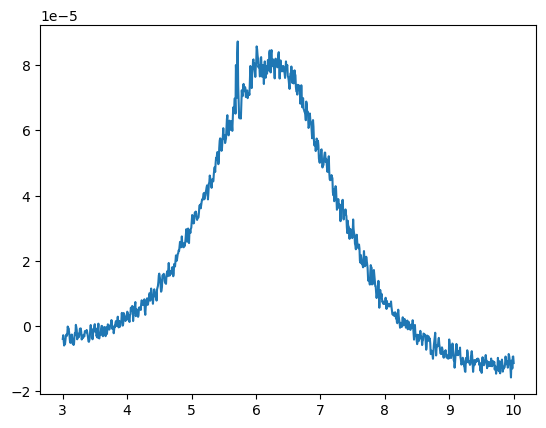

In [15]:
plt.plot(current,x)

In [14]:
Npts=100
current = np.linspace(5,6,Npts)
daq.flush()
for i in range(Npts):
    hmp.write(f'SOUR:CURR {current[i]}')
    time.sleep(0.1)
    daq.poll(0.1)

In [15]:
daq.poll?

Docstring:
poll(self: zhinst.core._core.ziDAQServer, recording_time_s: float, timeout_ms: int, flags: int = 0, flat: bool = False, group_id: int = 1) -> object

Poll all Events available before and within an given time period.

Continuously check for value changes (by calling pollEvent) in all
subscribed nodes for the specified duration and return the data. If
no value change occurs in subscribed nodes before duration + timeout,
poll returns no data. This function call is blocking (it is
synchronous). However, since all value changes are returned since
either subscribing to the node or the last poll (assuming no buffer
overflow has occurred on the Data Server), this function may be used
in a quasi-asynchronous manner to return data spanning a much longer
time than the specified duration. The timeout parameter is only
relevant when communicating in a slow network. In this case it may be
set to a value larger than the expected round-trip time in the
network.

Args:
    recording_time_s: 

In [48]:
daq.getSample(f"{demod_path}/sample")['x']

array([1.86669772e-06])